In [8]:
import networkx as nx
import matplotlib.pyplot as plt
import polars as pl
import numpy as np

In [9]:
edges = pl.read_csv("edgelists1.csv") #loading data
nodes = pl.read_csv("node_info1.csv")
print(edges)

id_list = edges['id'].unique(maintain_order=True).to_list() #keeps the main order
#id_list = sorted(edges['id'].unique().to_list()) #alphabetical sort 
print(id_list)

all_deg = []


def makegraph(a): 
    edges_group = edges.filter(pl.col('id') == a)
    G = nx.from_pandas_edgelist(edges_group, source = 'from', target = 'to') #Get the information from the tables df with node being from, target being to, and edges from connectivity (which one the node is connected to)
    #nx.draw(G, node_color = 'blue', node_size = 10, edgecolors='black', alpha = 0.7) #This draws the graph with specified node color, size, edge color and transparency
    #plt.title(a)  # add a title for each graph
    #plt.show()
    degrees = [d for n, d in G.degree()] #for each node in the node/degree dict, takes just the degrees into a list
    less2 = [d for d in degrees if d < 2]
    p = len(less2)/len(degrees)
    r = 2
    md = np.mean(degrees)
    vd = np.var(degrees)
    return md, vd

mean_degree = []
var_degree = []
for idx in id_list:
    md, vd = makegraph(idx)
    mean_degree.append(md.item())
    var_degree.append(vd.item())
#for i in id_list: #there's 382 networks so idk how we can make all of them and display 
#    makegraph(i)






shape: (3_259, 3)
┌─────────────────────┬──────┬─────┐
│ id                  ┆ from ┆ to  │
│ ---                 ┆ ---  ┆ --- │
│ str                 ┆ str  ┆ str │
╞═════════════════════╪══════╪═════╡
│ aus.2000.meas.1.00  ┆ P1   ┆ P2  │
│ aus.2000.meas.1.00  ┆ P1   ┆ P3  │
│ aus.2000.meas.1.00  ┆ P3   ┆ P4  │
│ aus.2000.meas.1.00  ┆ P3   ┆ P5  │
│ aus.2003.meas.1.00  ┆ P1   ┆ P2  │
│ …                   ┆ …    ┆ …   │
│ rou.2020.covid.1.16 ┆ P1   ┆ P2  │
│ rou.2020.covid.1.17 ┆ P1   ┆ P2  │
│ rou.2020.covid.1.18 ┆ P1   ┆ P2  │
│ rou.2020.covid.1.19 ┆ P1   ┆ P2  │
│ rou.2020.covid.1.20 ┆ P1   ┆ P2  │
└─────────────────────┴──────┴─────┘
['aus.2000.meas.1.00', 'aus.2003.meas.1.00', 'aus.2010.meas.1.00', 'bgd.2001.nph.1.01', 'bgd.2001.nph.1.02', 'bgd.2001.nph.1.03', 'bgd.2001.nph.1.04', 'bgd.2001.nph.1.05', 'bgd.2001.nph.1.06', 'bgd.2001.nph.1.07', 'bgd.2001.nph.1.08', 'bgd.2001.nph.1.11', 'bgd.2001.nph.1.12', 'bgd.2001.nph.1.13', 'bgd.2001.nph.1.14', 'bgd.2001.nph.1.15', 'bgd.2001.nph

In [10]:
mean_degree

[1.6,
 1.9090909090909092,
 1.7777777777777777,
 1.3333333333333333,
 1.6,
 1.6,
 1.6666666666666667,
 1.0,
 1.0,
 1.3333333333333333,
 1.0,
 1.6,
 1.8333333333333333,
 1.0,
 1.5,
 1.7142857142857142,
 1.0,
 1.9411764705882353,
 1.9473684210526316,
 1.9746835443037976,
 1.0,
 1.9714285714285715,
 1.95,
 1.9375,
 1.0,
 1.0,
 1.75,
 1.5,
 1.9393939393939394,
 1.7142857142857142,
 1.935483870967742,
 1.3333333333333333,
 1.3333333333333333,
 1.0,
 1.6666666666666667,
 1.945945945945946,
 1.9714285714285715,
 1.8181818181818181,
 1.7777777777777777,
 1.8666666666666667,
 1.9523809523809523,
 1.6666666666666667,
 1.9090909090909092,
 1.3333333333333333,
 1.8888888888888888,
 1.75,
 1.6666666666666667,
 1.3333333333333333,
 1.0,
 1.5,
 1.0,
 1.9591836734693877,
 1.8571428571428572,
 1.989247311827957,
 1.9393939393939394,
 1.7777777777777777,
 1.951219512195122,
 1.9,
 1.96,
 1.8823529411764706,
 1.9047619047619047,
 1.8888888888888888,
 1.9090909090909092,
 1.9130434782608696,
 1.8823529411

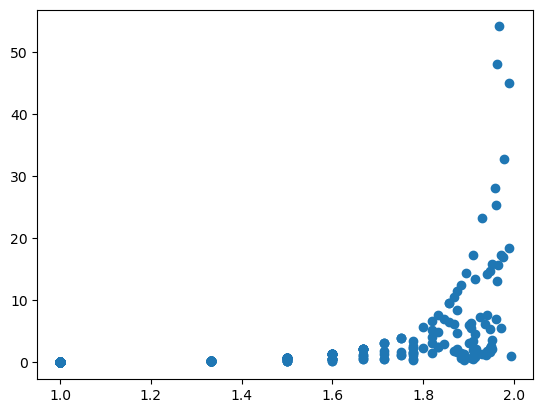

In [11]:
plt.scatter(mean_degree, var_degree)

Loads two CSVs (edgelists1.csv, node_info1.csv) and builds one combined graph over all outbreaks.

(Recommended) Uses composite node IDs like "{id}:{name}" so identical names (e.g., P1) from different outbreaks don’t collide.

Constructs a directed graph (default) so each node’s out-degree = secondary infections; can switch to undirected with use_out_degree=False.

Extracts the degree vector for all nodes (including zeros).

Fits a Negative Binomial (NB) to the empirical degree distribution 


Plots a histogram of degrees (0–30) and overlays the NB PMF using the fitted parameters.

Labels axes/legend and shows the sample mean and variance in the title.

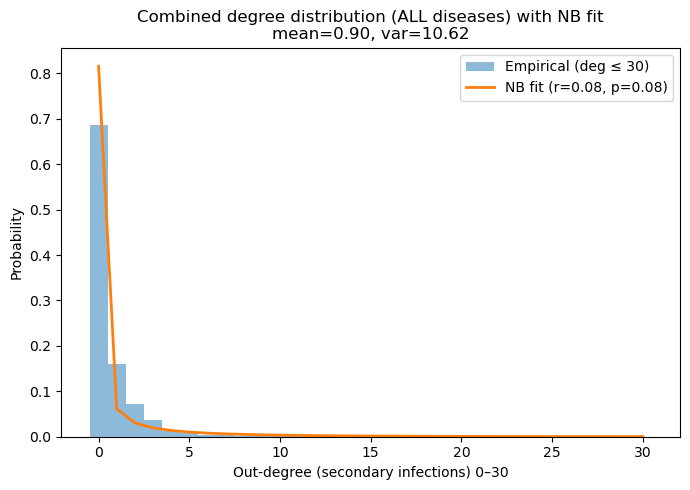

In [18]:
# Plot degree histogram with Negative Binomial (NB) fit — ALL DISEASES COMBINED

import polars as pl
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import nbinom

EDGES_CSV = "edgelists1.csv"
NODES_CSV = "node_info1.csv"

# --- Helper: method-of-moments NB fit on {0,1,2,...} ---
def fit_nb_mom(deg: np.ndarray):
 
    if deg.size == 0:
        raise ValueError("Empty degree array.")
    m = deg.mean()
    s2 = deg.var(ddof=1) if deg.size > 1 else 0.0
    if m > 0 and s2 > m:
        r_hat = (m**2) / (s2 - m)
        p_hat = r_hat / (r_hat + m)
    else:
        r_hat = 1e9
        p_hat = r_hat / (r_hat + m) if m > 0 else 0.999999999
    return r_hat, p_hat, m, s2

def main(use_out_degree: bool = True, max_plot: int = 30):
    # Load data
    edges_df = pl.read_csv(EDGES_CSV)
    nodes_df = pl.read_csv(NODES_CSV)

    # Build edge list and node list with the correct columns
    # (your files use 'from','to' for edges and 'name' for node IDs)
    edge_pairs = [(f"{i}:{u}", f"{i}:{v}") for i, u, v in edges_df.select(["id", "from", "to"]).rows()]
    node_names = [f"{i}:{n}" for i, n in nodes_df.select(["id", "name"]).rows()]

    # Graph across ALL diseases (combined)
    if use_out_degree:
        G = nx.DiGraph()
    else:
        G = nx.Graph()

    G.add_nodes_from(node_names)
    G.add_edges_from(edge_pairs)

    # Degree vector (include nodes with zero degree)
    if use_out_degree and isinstance(G, nx.DiGraph):
        deg = np.array([d for _, d in G.out_degree(node_names)], dtype=float)
        x_label = f"Out-degree (secondary infections) 0–{max_plot}"
    else:
        deg = np.array([d for _, d in G.degree(node_names)], dtype=float)
        x_label = f"Degree 0–{max_plot}"

    if deg.size == 0:
        raise ValueError("Degree sequence is empty after graph construction.")

    # Fit NB
    r_hat, p_hat, m, s2 = fit_nb_mom(deg)

    # Histogram + NB PMF overlay
    deg_int = deg.astype(int)
    xmax = int(deg_int.max())
    x = np.arange(0, min(xmax, max_plot) + 1)
    pmf_nb = nbinom.pmf(x, r_hat, p_hat, loc=0)

    plt.figure(figsize=(7, 5))
    plt.hist(
        deg_int[deg_int <= max_plot],
        bins=np.arange(-0.5, max_plot + 1.5, 1),
        density=True, alpha=0.5, label=f"Empirical (deg ≤ {max_plot})"
    )
    plt.plot(x, pmf_nb, lw=2, label=f"NB fit (r={r_hat:.2f}, p={p_hat:.2f})")
    plt.xlabel(x_label)
    plt.ylabel("Probability")
    plt.title(f"Combined degree distribution (ALL diseases) with NB fit\nmean={m:.2f}, var={s2:.2f}")
    plt.legend()
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # use_out_degree=True → transmission (secondary infections); False → undirected contact degree
    main(use_out_degree=True, max_plot=30)



=== chn.2003.sars.1.00 ===
Cases: 79
Mean (R proxy): 0.9873
Variance:       18.1152
k (dispersion): 0.0569156
p:              0.054503


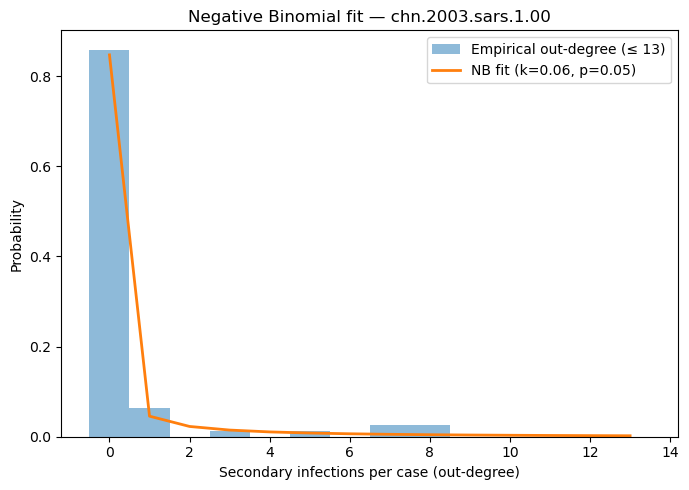


=== kor.2015.mers.1.00 ===
Cases: 186
Mean (R proxy): 0.9946
Variance:       45.5189
k (dispersion): 0.0222188
p:              0.021851


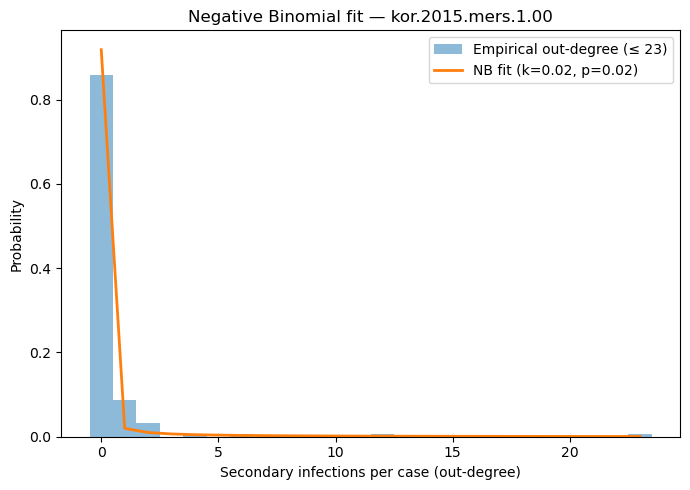


=== chn.2020.covid.1.00 ===
Cases: 20
Mean (R proxy): 0.9500
Variance:       3.6289
k (dispersion): 0.336886
p:              0.261784


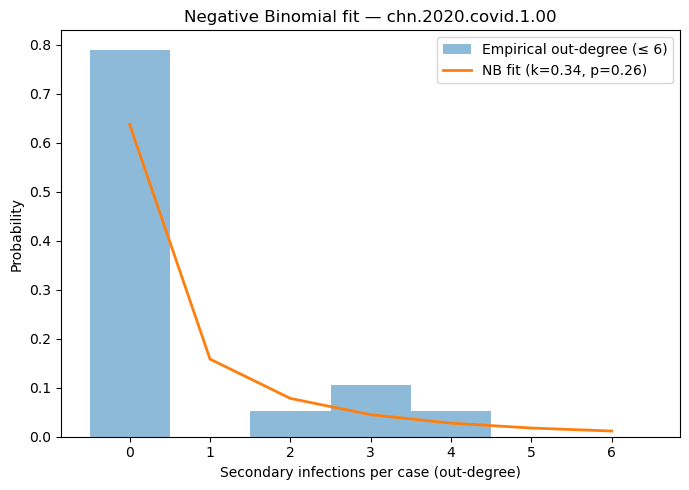

In [19]:
import polars as pl
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import nbinom  

# Path to edge list CSV. Expected columns: id, from, to
EDGES_PATH = "edgelists1.csv"

# Outbreak IDs 
TARGET_DISEASES = ["chn.2003.sars.1.00", "kor.2015.mers.1.00", "chn.2020.covid.1.00"]

# Load edges (id, from, to) 
edges_df = pl.read_csv(EDGES_PATH)  # columns: id, from, to

# Build a namespaced directed graph:
#   - Use DiGraph so out-degree = number of secondary infections
#   - Prefix each node with its outbreak id (e.g., "chn.2003.sars.1.00:P1")
G = nx.DiGraph()
for rid, u, v in edges_df.select(["id", "from", "to"]).rows():
    u_ns = f"{rid}:{u}"  # namespaced source node
    v_ns = f"{rid}:{v}"  # namespaced target node
    G.add_edge(u_ns, v_ns)

# Method-of-moments Negative Binomial 
# Returns:
#   mean (sample mean), var (sample variance, ddof=1),
#   k (dispersion / "size" parameter in NB), p (success probability in SciPy's nbinom)
# Notes:
#   - If variance <= mean, data are not overdispersed; we approximate a Poisson by k → large.
def fit_nb_mom(sample):
    x = np.asarray(sample, dtype=float)
    if x.size == 0:
        return dict(mean=0.0, var=0.0, k=np.inf, p=1.0)
    m = x.mean()
    s2 = x.var(ddof=1) if x.size > 1 else 0.0
    if m <= 0:
        # No infections on average; NB undefined ⇒ return Poisson-like limit
        return dict(mean=m, var=s2, k=np.inf, p=1.0)
    if s2 > m:
        # Overdispersed: solve method-of-moments for NB parameters
        #   Var = m + m^2/k  ⇒  k = m^2 / (Var - m)
        #   mean = r(1-p)/p with r=k  ⇒  p = k/(k+m)
        k = (m**2) / (s2 - m)
        p = k / (k + m)
    else:
        # Not overdispersed (Poisson-like): emulate Poisson by taking k very large
        k = 1e12
        p = k / (k + m)
    return dict(mean=m, var=s2, k=k, p=p)

# Fit NB and plot the histogram + NB PMF for each outbreak separately
for outbreak in TARGET_DISEASES:
    # Collect nodes that belong to this outbreak by namespaced prefix
    nodes_d = [n for n in G.nodes if n.startswith(outbreak + ":")]
    if not nodes_d:
        print(f"[WARN] No nodes found for {outbreak}. Check the id string.")
        continue

    # Induced subgraph for the outbreak
    H = G.subgraph(nodes_d).copy()

    # Secondary infections per case = out-degree in the directed graph
    deg_out = np.array([H.out_degree(n) for n in nodes_d], dtype=int)

    # Fit Negative Binomial via MoM
    fit = fit_nb_mom(deg_out)

    # Console summary
    print(f"\n=== {outbreak} ===")
    print(f"Cases: {len(deg_out)}")
    print(f"Mean (R proxy): {fit['mean']:.4f}")
    print(f"Variance:       {fit['var']:.4f}")
    print(f"k (dispersion): {fit['k']:.6g}")
    print(f"p:              {fit['p']:.6f}")

    # Plot: empirical histogram of out-degree and the fitted NB PMF over 0..xmax_plot
    if len(deg_out) > 0:
        # Choose a readable x-maximum (99th percentile, capped at 40)
        xmax_plot = min(int(np.percentile(deg_out, 99)), 40)
        x = np.arange(0, xmax_plot + 1)

        # SciPy NB parameterization: nbinom.pmf(k; r=k, p=p) on {0,1,2,...}
        pmf_nb = nbinom.pmf(x, fit["k"], fit["p"], loc=0)

        plt.figure(figsize=(7, 5))
        plt.hist(
            deg_out[deg_out <= xmax_plot],
            bins=np.arange(-0.5, xmax_plot + 1.5, 1),
            density=True, alpha=0.5,
            label=f"Empirical out-degree (≤ {xmax_plot})"
        )
        plt.plot(x, pmf_nb, lw=2, label=f"NB fit (k={fit['k']:.2f}, p={fit['p']:.2f})")
        plt.xlabel("Secondary infections per case (out-degree)")
        plt.ylabel("Probability")
        plt.title(f"Negative Binomial fit — {outbreak}")
        plt.legend()
        plt.tight_layout()
        plt.show()


For each target outbreak ID:

Compute secondary infections per node = how many people each case infected (out-degree).

Plot a scatter of those per-node counts (one figure per disease).

Compute the mean and variance of those counts.

After looping through all diseases, plot a combined scatter of mean vs. variance (one point per disease).

Save a CSV summary (secondary_infection_stats.csv) with the metrics.

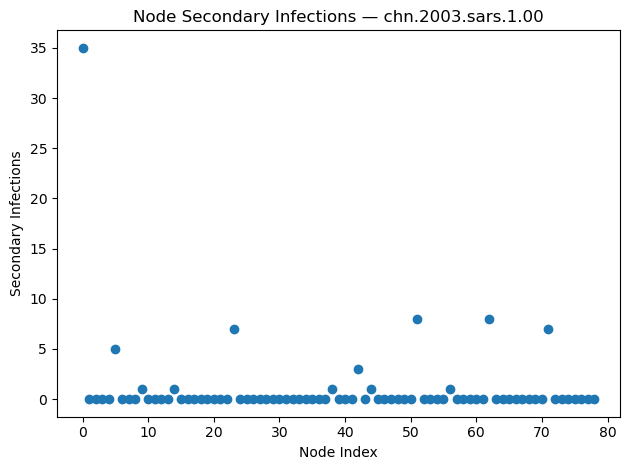

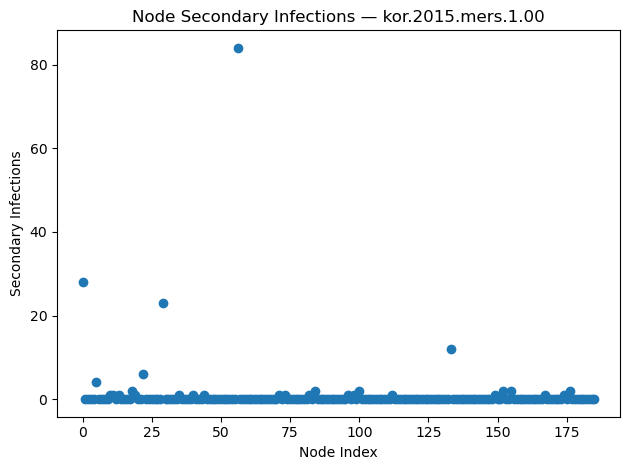

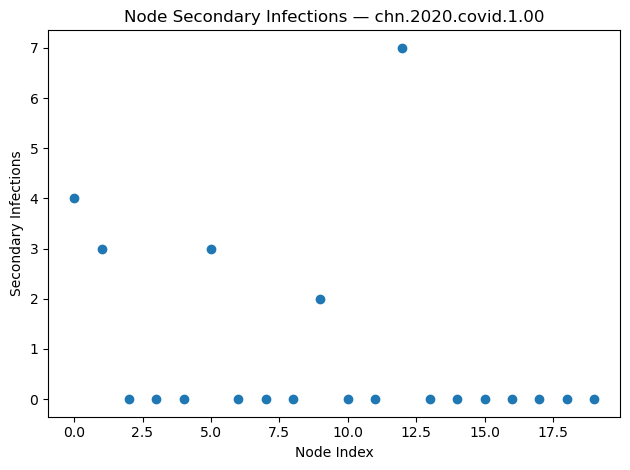

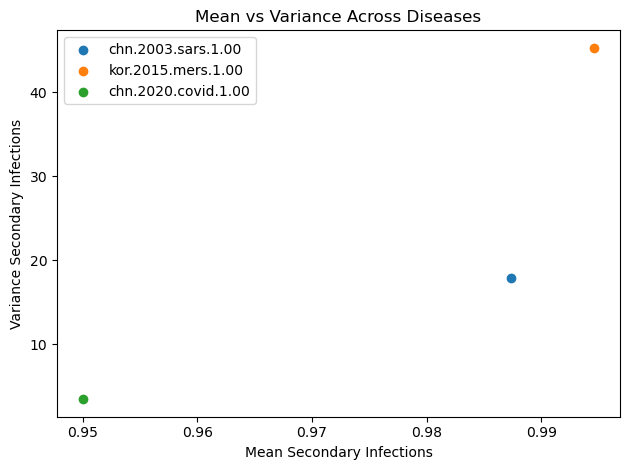

Saved summary to /Users/adazhang/Developer/BIOL4559/Final Project /secondary_infection_stats.csv


In [15]:


import polars as pl
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

EDGES_CSV = "edgelists1.csv"
NODES_CSV = "node_info1.csv"
TARGET_DISEASES = ["chn.2003.sars.1.00", "kor.2015.mers.1.00", "chn.2020.covid.1.00"]

def per_disease_secondary_counts(edges: pl.DataFrame, nodes: pl.DataFrame, disease_id: str) -> pl.DataFrame:
    e = edges.filter(pl.col("id") == disease_id)
    n = nodes.filter(pl.col("id") == disease_id).select("name")

    # out-degree = number of times a case appears as `from` in the edge list
    out_counts = (
        e.group_by("from")
         .len()
         .rename({"from": "name", "len": "secondary_infections"})
    )

    # join to ensure nodes with no onward infections show as 0
    per_node = (
        n.join(out_counts, on="name", how="left")
         .with_columns(pl.col("secondary_infections").fill_null(0))
         .with_columns(pl.col("secondary_infections").cast(pl.Float64))
    )
    return per_node

def plot_node_scatter(per_node: pl.DataFrame, disease_id: str) -> None:
    y = per_node["secondary_infections"].to_numpy()
    x = np.arange(len(y))
    plt.figure()
    plt.scatter(x, y, marker="o")
    plt.xlabel("Node Index")
    plt.ylabel("Secondary Infections")
    plt.title(f"Node Secondary Infections — {disease_id}")
    plt.tight_layout()
    plt.show()

def main():
    edges = pl.read_csv(EDGES_CSV)
    nodes = pl.read_csv(NODES_CSV)

    results = []  # store (disease, mean, variance, n_nodes, n_edges)

    for disease in TARGET_DISEASES:
        per_node = per_disease_secondary_counts(edges, nodes, disease)
        counts = per_node["secondary_infections"].to_numpy()
        mean_val = float(np.mean(counts))
        var_val = float(np.var(counts, ddof=0))  # population variance

        # node-level scatter
        plot_node_scatter(per_node, disease)

        # collect summary
        n_edges = int(edges.filter(pl.col("id") == disease).height)
        results.append({
            "disease": disease,
            "mean_secondary_infections": mean_val,
            "variance_secondary_infections": var_val,
            "n_nodes": int(per_node.height),
            "n_edges": n_edges,
        })

    # mean-vs-variance combined scatter
    plt.figure()
    for r in results:
        plt.scatter(r["mean_secondary_infections"], r["variance_secondary_infections"], label=r["disease"], marker="o")
    plt.xlabel("Mean Secondary Infections")
    plt.ylabel("Variance Secondary Infections")
    plt.title("Mean vs Variance Across Diseases")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # save summary CSV
    out = pl.DataFrame(results)
    out_path = Path("secondary_infection_stats.csv")
    out.write_csv(out_path)
    print(f"Saved summary to {out_path.resolve()}")

if __name__ == "__main__":
    main()



=== chn.2003.sars.1.00 ===
Cases: 79
Mean (R proxy): 0.9873
Variance:       18.1152
k (dispersion): 0.0569156
p:              0.054503


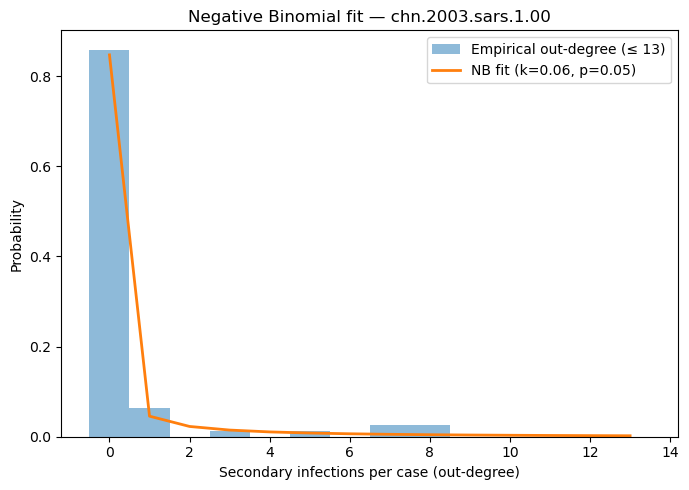

Mean final size over 1000 sims: 171.49
Median final size:                  17.00
Extinction probability by gen 20: 0.963


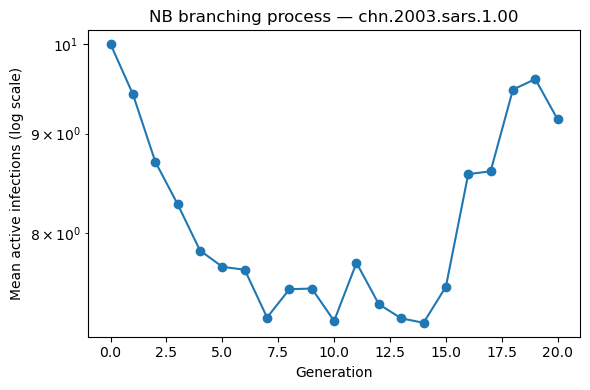


=== kor.2015.mers.1.00 ===
Cases: 186
Mean (R proxy): 0.9946
Variance:       45.5189
k (dispersion): 0.0222188
p:              0.021851


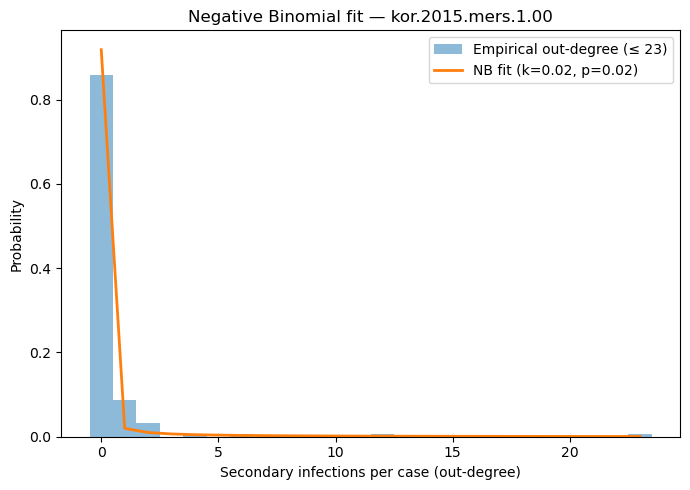

Mean final size over 1000 sims: 216.75
Median final size:                  11.00
Extinction probability by gen 20: 0.976


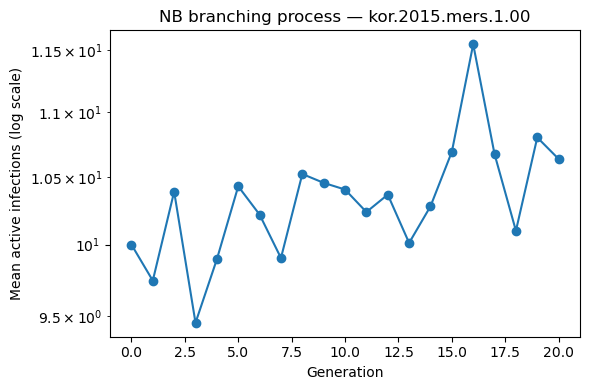


=== chn.2020.covid.1.00 ===
Cases: 20
Mean (R proxy): 0.9500
Variance:       3.6289
k (dispersion): 0.336886
p:              0.261784


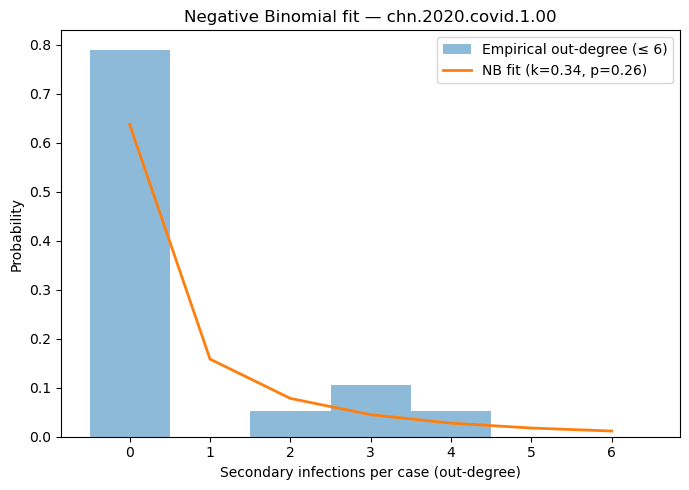

Mean final size over 1000 sims: 131.48
Median final size:                  47.50
Extinction probability by gen 20: 0.871


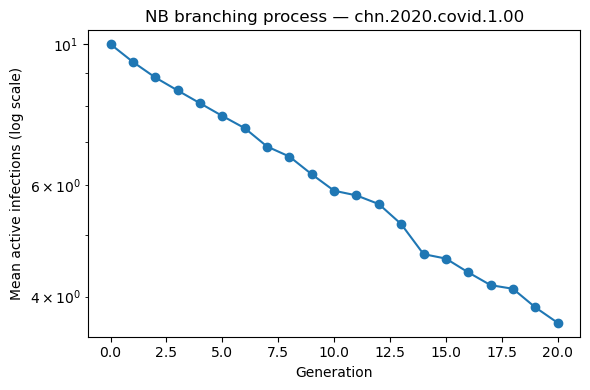

In [8]:
import polars as pl
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import nbinom  

# -----------------------------
#  Paths and outbreak selection
# -----------------------------
EDGES_PATH = "edgelists1.csv"

TARGET_DISEASES = [
    "chn.2003.sars.1.00",
    "kor.2015.mers.1.00",
    "chn.2020.covid.1.00",
]

# -----------------------------
#  Load edges and build graph
# -----------------------------
edges_df = pl.read_csv(EDGES_PATH)  # expected columns: id, from, to

# Build a namespaced directed graph:
#   node format: "<outbreak_id>:<case_name>" (e.g. "chn.2003.sars.1.00:P1")
G = nx.DiGraph()
for rid, u, v in edges_df.select(["id", "from", "to"]).rows():
    u_ns = f"{rid}:{u}"
    v_ns = f"{rid}:{v}"
    G.add_edge(u_ns, v_ns)

# -----------------------------
#  Method-of-moments NB fitting
# -----------------------------
def fit_nb_mom(sample):
    """
    Fit a Negative Binomial to non-negative integer data via method-of-moments.

    Returns dict:
        - mean: sample mean
        - var:  sample variance (ddof=1)
        - k:    dispersion / "size" parameter
        - p:    success probability in SciPy's nbinom (on {0,1,2,...})

    NB parameterization (epidemic-style):
        Var = m + m^2 / k
        m = k(1-p)/p  =>  p = k / (k + m)
    """
    x = np.asarray(sample, dtype=float)
    if x.size == 0:
        return dict(mean=0.0, var=0.0, k=np.inf, p=1.0)

    m = x.mean()
    s2 = x.var(ddof=1) if x.size > 1 else 0.0

    if m <= 0:
        # no infections on average; NB not meaningful
        return dict(mean=m, var=s2, k=np.inf, p=1.0)

    if s2 > m:
        # overdispersed → true NB
        k = (m**2) / (s2 - m)
        p = k / (k + m)
    else:
        # not overdispersed → approximate Poisson by taking k very large
        k = 1e12
        p = k / (k + m)

    return dict(mean=m, var=s2, k=k, p=p)

# -----------------------------
#  Branching process simulator
# -----------------------------
def simulate_branching(fit, max_generations=10, initial_cases=1, rng=None):
    """
    Galton–Watson branching process with NB offspring.

    - fit: dict from fit_nb_mom with keys 'mean', 'k', 'p'
    - max_generations: simulate generations G0..G_max
    - initial_cases: number of index cases at generation 0
    - rng: numpy.random.Generator (optional)

    Returns:
        list[int] = number of ACTIVE infections per generation [G0, G1, ..., G_max]
    """
    if rng is None:
        rng = np.random.default_rng()

    mu = fit["mean"]
    k  = fit["k"]
    p  = fit["p"]

    # If k is huge or infinite, treat as Poisson-like to avoid huge shape
    poisson_like = (k > 1e8) or np.isinf(k)

    sizes = [int(initial_cases)]
    current = int(initial_cases)

    for _ in range(max_generations):
        if current == 0:
            sizes.append(0)
            continue

        if poisson_like:
            # Sum of 'current' Poisson(mu) RVs ~ Poisson(current * mu)
            new_cases = np.random.poisson(mu * current)
        else:
            # Sum of 'current' NB(k, p) RVs ~ NB(current * k, p)
            r_total = current * k
            new_cases = nbinom.rvs(r_total, p, loc=0, random_state=rng)

        new_cases = int(new_cases)
        sizes.append(new_cases)
        current = new_cases

    return sizes

# -----------------------------
#  Main analysis & simulation
# -----------------------------
rng = np.random.default_rng(42)

for outbreak in TARGET_DISEASES:
    # Collect namespaced nodes that belong to this outbreak
    nodes_d = [n for n in G.nodes if n.startswith(outbreak + ":")]
    if not nodes_d:
        print(f"[WARN] No nodes found for {outbreak}. Check the id string.")
        continue

    # Induced subgraph for this outbreak
    H = G.subgraph(nodes_d).copy()

    # Secondary infections per case = out-degree in the directed graph
    deg_out = np.array([H.out_degree(n) for n in nodes_d], dtype=int)

    # Fit Negative Binomial via method-of-moments
    fit = fit_nb_mom(deg_out)

    # Console summary
    print(f"\n=== {outbreak} ===")
    print(f"Cases: {len(deg_out)}")
    print(f"Mean (R proxy): {fit['mean']:.4f}")
    print(f"Variance:       {fit['var']:.4f}")
    print(f"k (dispersion): {fit['k']:.6g}")
    print(f"p:              {fit['p']:.6f}")

    # -------------------------
    #  Plot offspring fit (NB)
    # -------------------------
    if len(deg_out) > 0:
        # Choose max x for plotting (99th percentile, cap at 40 to keep it readable)
        xmax_plot = min(int(np.percentile(deg_out, 99)), 40)
        x = np.arange(0, xmax_plot + 1)

        pmf_nb = nbinom.pmf(x, fit["k"], fit["p"], loc=0)

        plt.figure(figsize=(7, 5))
        plt.hist(
            deg_out[deg_out <= xmax_plot],
            bins=np.arange(-0.5, xmax_plot + 1.5, 1),
            density=True,
            alpha=0.5,
            label=f"Empirical out-degree (≤ {xmax_plot})"
        )
        plt.plot(
            x,
            pmf_nb,
            lw=2,
            label=f"NB fit (k={fit['k']:.2f}, p={fit['p']:.2f})"
        )
        plt.xlabel("Secondary infections per case (out-degree)")
        plt.ylabel("Probability")
        plt.title(f"Negative Binomial fit — {outbreak}")
        plt.legend()
        plt.tight_layout()
        plt.show()

    # -------------------------
    #  Branching process sims
    # -------------------------
    n_sims   = 1000   # number of simulations
    max_gen  = 20     # generations
    I0       = 10     # starting number of infectious individuals at generation 0

    trajectories = [
        simulate_branching(fit, max_generations=max_gen, initial_cases=I0, rng=rng)
        for _ in range(n_sims)
    ]

    traj_arr   = np.array(trajectories)       # (n_sims, max_gen+1)
    cum_sizes  = traj_arr.cumsum(axis=1)      # cumulative infections
    final_size = cum_sizes[:, -1]

    # Extinction = no active infections in last generation
    extinctions = (traj_arr[:, -1] == 0)

    print(f"Mean final size over {n_sims} sims: {final_size.mean():.2f}")
    print(f"Median final size:                  {np.median(final_size):.2f}")
    print(f"Extinction probability by gen {max_gen}: {extinctions.mean():.3f}")

    # Mean active infections by generation (Althouse-style)
    gens = np.arange(max_gen + 1)
    mean_by_gen = traj_arr.mean(axis=0)

    plt.figure(figsize=(6, 4))
    plt.plot(gens, mean_by_gen, marker="o")
    plt.yscale("log")  # log scale is typical for these plots
    plt.xlabel("Generation")
    plt.ylabel("Mean active infections (log scale)")
    plt.title(f"NB branching process — {outbreak}")
    plt.tight_layout()
    plt.show()


This plot shows the mean number of active infections per generation for the 2015 South Korea MERS outbreak under a branching process with NB offspring. Starting with 10 initial cases, the average number of infections per generation fluctuates around ~10 on a log scale, indicating that the effective reproduction number R is close to 1. The process does not exhibit exponential growth or rapid extinction, but instead shows moderate variability consistent with overdispersed transmission (superspreading). These fluctuations reflect occasional high-transmission events balanced by many zero-transmission individuals, which is characteristic of MERS-CoV dynamics in 2015.

This plot shows the mean number of active infections across generations for the early COVID-19 outbreak in the dataset “chn.2020.covid.1.00,” simulated using a Negative Binomial branching process. The monotonic decline from ~10 to ~3 active infections on a log scale indicates that the effective reproduction number (R) for this cluster is significantly below 1. The smooth downward trend also suggests relatively low transmission heterogeneity. As a result, most transmission chains shrink steadily and ultimately go extinct. This aligns with empirical findings that many early COVID transmission clusters in China during January 2020 were quickly contained and did not display the large superspreading observed later in the pandemic.


=== chn.2003.sars.1.00 ===
Cases in data:                   79
Empirical R (mean out-degree):   0.9873
Forced R used in sims:           2.0000
k (dispersion from data):        0.0569156
Mean final size (empirical R):   138.60
Mean final size (forced R=2):    24858399.46
Extinction prob (empirical R):   0.972
Extinction prob (forced R=2):    0.472


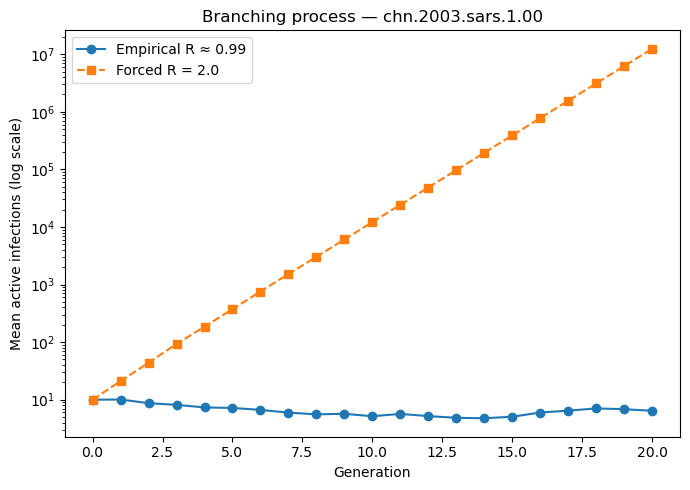


=== kor.2015.mers.1.00 ===
Cases in data:                   186
Empirical R (mean out-degree):   0.9946
Forced R used in sims:           2.0000
k (dispersion from data):        0.0222188
Mean final size (empirical R):   114.94
Mean final size (forced R=2):    18815903.18
Extinction prob (empirical R):   0.992
Extinction prob (forced R=2):    0.790


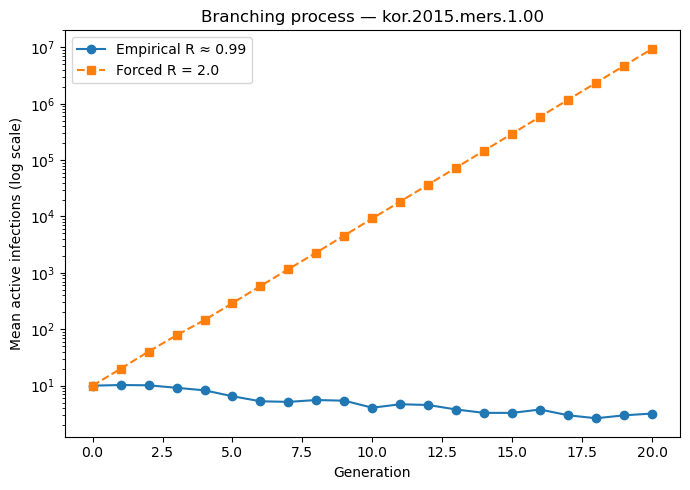


=== chn.2020.covid.1.00 ===
Cases in data:                   20
Empirical R (mean out-degree):   0.9500
Forced R used in sims:           2.0000
k (dispersion from data):        0.336886
Mean final size (empirical R):   140.34
Mean final size (forced R=2):    20094814.96
Extinction prob (empirical R):   0.868
Extinction prob (forced R=2):    0.042


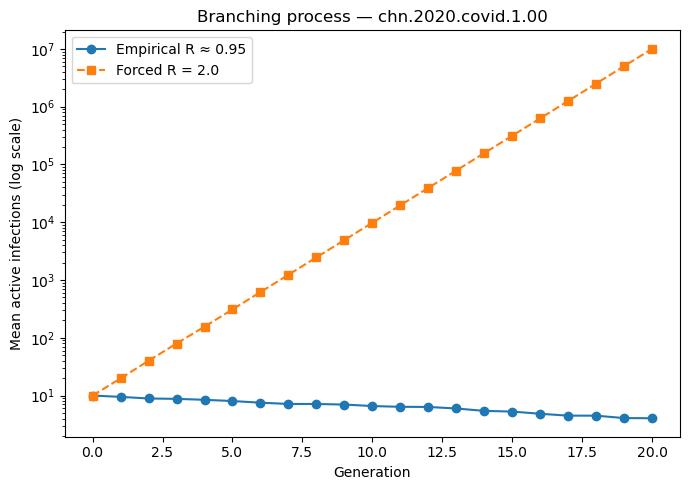

In [1]:
import polars as pl
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import nbinom  

# -----------------------------
#  Paths and outbreak selection
# -----------------------------
EDGES_PATH = "edgelists1.csv"

TARGET_DISEASES = [
    "chn.2003.sars.1.00",
    "kor.2015.mers.1.00",
    "chn.2020.covid.1.00",
]

# -----------------------------
#  Load edges and build graph
# -----------------------------
edges_df = pl.read_csv(EDGES_PATH)  # expected columns: id, from, to

# Build a namespaced directed graph:
#   node format: "<outbreak_id>:<case_name>" (e.g. "chn.2003.sars.1.00:P1")
G = nx.DiGraph()
for rid, u, v in edges_df.select(["id", "from", "to"]).rows():
    u_ns = f"{rid}:{u}"
    v_ns = f"{rid}:{v}"
    G.add_edge(u_ns, v_ns)

# -----------------------------
#  Method-of-moments NB fitting
# -----------------------------
def fit_nb_mom(sample):
    """
    Fit a Negative Binomial to non-negative integer data via method-of-moments.

    Returns dict:
        - mean: sample mean (R estimate)
        - var:  sample variance (ddof=1)
        - k:    dispersion / "size" parameter
        - p:    success probability in SciPy's nbinom (on {0,1,2,...})

    NB parameterization (epidemic-style):
        Var = m + m^2 / k
        m = k(1-p)/p  =>  p = k / (k + m)
    """
    x = np.asarray(sample, dtype=float)
    if x.size == 0:
        return dict(mean=0.0, var=0.0, k=np.inf, p=1.0)

    m = x.mean()
    s2 = x.var(ddof=1) if x.size > 1 else 0.0

    if m <= 0:
        # no infections on average; NB not meaningful
        return dict(mean=m, var=s2, k=np.inf, p=1.0)

    if s2 > m:
        # overdispersed → true NB
        k = (m**2) / (s2 - m)
        p = k / (k + m)
    else:
        # not overdispersed → approximate Poisson by taking k very large
        k = 1e12
        p = k / (k + m)

    return dict(mean=m, var=s2, k=k, p=p)

# -----------------------------
#  Branching process simulator
# -----------------------------
def simulate_branching(fit, max_generations=20, initial_cases=10, rng=None):
    """
    Galton–Watson branching process with NB offspring.

    - fit: dict with keys 'mean', 'k', 'p'
    - max_generations: simulate generations G0..G_max
    - initial_cases: number of infectious individuals at generation 0
    - rng: numpy.random.Generator (optional)

    Returns:
        list[int] = number of ACTIVE infections per generation [G0, G1, ..., G_max]
    """
    if rng is None:
        rng = np.random.default_rng()

    mu = fit["mean"]
    k  = fit["k"]
    p  = fit["p"]

    # If k is huge or infinite, treat as Poisson-like
    poisson_like = (k > 1e8) or np.isinf(k)

    sizes = [int(initial_cases)]
    current = int(initial_cases)

    for _ in range(max_generations):
        if current == 0:
            sizes.append(0)
            continue

        if poisson_like:
            # Sum of 'current' Poisson(mu) RVs ~ Poisson(current * mu)
            new_cases = np.random.poisson(mu * current)
        else:
            # Sum of 'current' NB(k, p) RVs ~ NB(current * k, p)
            r_total = current * k
            new_cases = nbinom.rvs(r_total, p, loc=0, random_state=rng)

        new_cases = int(new_cases)
        sizes.append(new_cases)
        current = new_cases

    return sizes

# -----------------------------
#  Main analysis & simulation
# -----------------------------
rng = np.random.default_rng(42)

FORCED_R = 2.0  # target R for the "forced" scenario

for outbreak in TARGET_DISEASES:
    # Collect namespaced nodes that belong to this outbreak
    nodes_d = [n for n in G.nodes if n.startswith(outbreak + ":")]
    if not nodes_d:
        print(f"[WARN] No nodes found for {outbreak}. Check the id string.")
        continue

    # Induced subgraph for this outbreak
    H = G.subgraph(nodes_d).copy()

    # Secondary infections per case = out-degree in the directed graph
    deg_out = np.array([H.out_degree(n) for n in nodes_d], dtype=int)

    # Fit NB via method-of-moments (empirical R and k)
    fit_emp = fit_nb_mom(deg_out)

    empirical_R = fit_emp["mean"]

    # Forced-R fit: copy k but set mean to FORCED_R
    fit_forced = fit_emp.copy()
    fit_forced["mean"] = FORCED_R
    fit_forced["p"] = fit_forced["k"] / (fit_forced["k"] + fit_forced["mean"])

    print(f"\n=== {outbreak} ===")
    print(f"Cases in data:                   {len(deg_out)}")
    print(f"Empirical R (mean out-degree):   {empirical_R:.4f}")
    print(f"Forced R used in sims:           {fit_forced['mean']:.4f}")
    print(f"k (dispersion from data):        {fit_emp['k']:.6g}")

    # -------------------------
    #  Branching process sims
    # -------------------------
    n_sims   = 500   # number of simulations
    max_gen  = 20    # generations
    I0       = 10    # initial infectious individuals

    # 1) Baseline branching with empirical R
    trajectories_emp = [
        simulate_branching(fit_emp, max_generations=max_gen, initial_cases=I0, rng=rng)
        for _ in range(n_sims)
    ]

    # 2) Branching with forced R = 2
    trajectories_forced = [
        simulate_branching(fit_forced, max_generations=max_gen, initial_cases=I0, rng=rng)
        for _ in range(n_sims)
    ]

    arr_emp    = np.array(trajectories_emp)
    arr_forced = np.array(trajectories_forced)

    # Cumulative sizes & extinction
    cum_emp    = arr_emp.cumsum(axis=1)
    cum_forced = arr_forced.cumsum(axis=1)

    final_emp    = cum_emp[:, -1]
    final_forced = cum_forced[:, -1]

    ext_emp    = (arr_emp[:, -1] == 0).mean()
    ext_forced = (arr_forced[:, -1] == 0).mean()

    print(f"Mean final size (empirical R):   {final_emp.mean():.2f}")
    print(f"Mean final size (forced R=2):    {final_forced.mean():.2f}")
    print(f"Extinction prob (empirical R):   {ext_emp:.3f}")
    print(f"Extinction prob (forced R=2):    {ext_forced:.3f}")

    # Mean active infections by generation
    gens        = np.arange(max_gen + 1)
    mean_emp    = arr_emp.mean(axis=0)
    mean_forced = arr_forced.mean(axis=0)

    plt.figure(figsize=(7, 5))
    plt.plot(gens, mean_emp,    marker="o", label=f"Empirical R ≈ {empirical_R:.2f}")
    plt.plot(gens, mean_forced, marker="s", linestyle="--",
             label=f"Forced R = {FORCED_R:.1f}")
    plt.yscale("log")
    plt.xlabel("Generation")
    plt.ylabel("Mean active infections (log scale)")
    plt.title(f"Branching process — {outbreak}")
    plt.legend()
    plt.tight_layout()
    plt.show()
